# Systems of ODEs and Higher Order ODEs

**Preliminary version of March 30, 2021**

The short version of this section is that the numerical methods and algorithms developed so for for the initial value problem

$$
\begin{split}
\frac{d u}{d t} &= f(t, u(t)), \quad a \leq t \leq b
\\
u(a) &= u_0
\end{split}
$$

all also work for system of first order ODEs by simply letting $u$ and $f$ be vector-valued,
and the Python code requires only one very small change.

Also, higher order ODE's (and syrem of them) can be converted into system of first order ODEs.

The second point is seen in a typical first course in differential equations, so I will just illutrate the procedure for a single famous example.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
# Shortcuts for some favorite commands:
from numpy import linspace
from matplotlib.pyplot import figure, plot, grid, title, xlabel, ylabel, legend

## Motion of a Damped Mass-Spring System in One Dimension

A simple mathematical model of a damped mass-spring system is

$$
\begin{split}
M \frac{d^2 y}{d t^2} &= -k u - D \frac{d y}{d t}
\\
& \text{with initial conditions}
\\
y(a) &= y_0
\\
\left. \frac{dy}{dt} \right|_{t=a} &= v_0
\end{split}
$$

where $k$ is the spring constant and $D$ is the coefficient of friction, or drag.

To convert to a first order system, introduction the two functions

$$
\begin{split}
u_0(t) &= y(t)
\\
u_1(t) &= \frac{d y}{d t}
\end{split}
$$

(Aside: this is one of many places where the Pythonic system of counting from $0$ fits the mathematics better!)

Then with $d^2 y/dt^2 = d u_1/dt$ the above equation becomes

$$
\frac{d u_1}{d t} = -\frac{k}{M} u_0 - \frac{D}{M} u_1
$$

Combined with the definition of $u_1$ give the system

$$
\begin{split}
\frac{d u_0}{d t} &= u_1
\\
\frac{d u_1}{d t} &= -\frac{k}{M} u_0 - \frac{D}{M} u_1
\\
&\text{with initial conditions}
\\
u_0(a) &= y_0
\\
u_1(a) &= v_0
\end{split}
$$

Next this can be put into vector form.
Defining the vector-valued functions

$$
\begin{split}
\tilde{u}(t) &= \langle u_0(t), u_1(t) \rangle
\\
\tilde{f}(t, \tilde{u}(t)) &= \left\langle u_1(t), -\frac{k}{M} u_0(t) - \frac{D}{M} u_1(t) \right\rangle
\end{split}
$$

and initial data vector

$$\tilde{u}_0 = \langle u_{0,0}, u_{0,1} \rangle = \langle y_0, v_0 \rangle$$

puts the ODE IVP into the form

$$
\begin{split}
\frac{d \tilde{u}}{d t} &= \tilde{f}(t, \tilde{u}(t)), \quad a \leq t \leq b
\\
\tilde{u}(a) &= \tilde{u}_0
\end{split}
$$

The Euler's method code from before:

In [2]:
def euler(f, a, b, u_0, n=100):
    """Use Euler's Method to solve du/dt = f(t, u) for t in [a, b], with initial value u(a) = u_0"""
    h = (b-a)/n
    t = np.linspace(a, b, n+1)  # Note: "n" counts steps, so there are n+1 values for t.
    u = np.empty_like(t)
    U[0] = u_0
    for i in range(n):
        U[i+1] = U[i] + f(t[i], U[i])*h
    return (t, U)

does not quite work, but only slgiht modificsit is needed: 

In [3]:
def euler_system(f, a, b, u_0, n=100):
    """Use Euler's Method to solve du/dt = f(t, u) for t in [a, b], with initial value u(a) = u_0
    Modified from function euler to handle systems."""
    h = (b-a)/n
    t = np.linspace(a, b, n+1)  # Note: "n" counts steps, so there are n+1 values for t.
    
    # Only the following two lines change for the systems version
    n_unknowns = len(u_0)
    U = np.zeros([n+1, n_unknowns])

    U[0] = np.array(u_0)
    for i in range(n):
        U[i+1] = U[i] + f(t[i], U[i])*h
    return (t, U)

In [4]:
M = 1.
k = 1.
D = 0.01
u_0 = [1., 0.]
a = 0
b = 8 * np.pi # Four periods
def f(t, u):
    return np.array([ u[1], -(k/M)*u[0] - (D/M)*u[1]])

In [5]:
(t, U) = euler_system(f, a, b, u_0, n=10000)
y = U[:,0]
Dy = U[:,1]

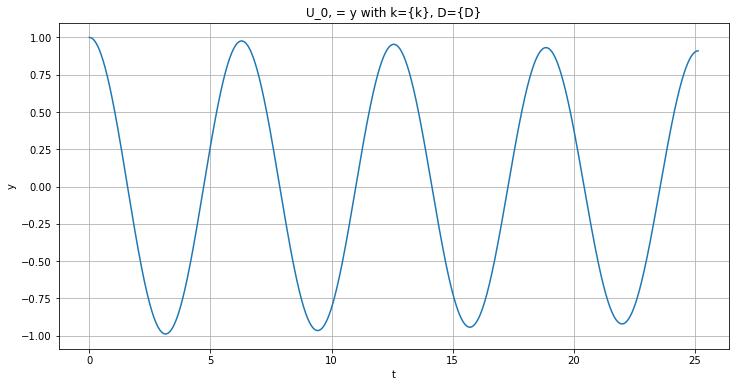

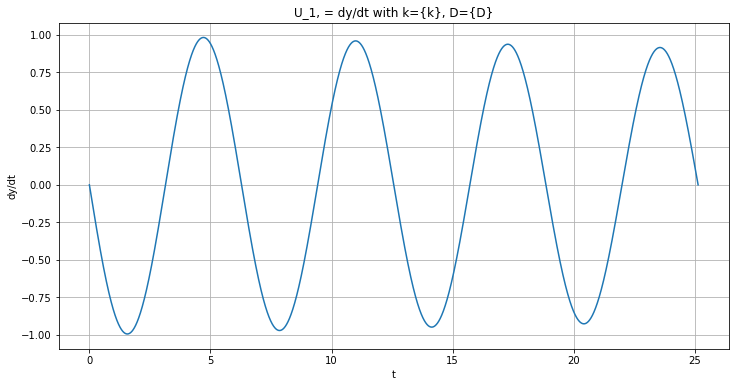

In [6]:
figure(figsize=[12,6])
title("U_0, = y with k={k}, D={D}")
plot(t, y)
xlabel('t')
ylabel('y')
grid(True)

figure(figsize=[12,6])
title("U_1, = dy/dt with k={k}, D={D}")
plot(t, Dy)
xlabel('t')
ylabel('dy/dt')
grid(True)

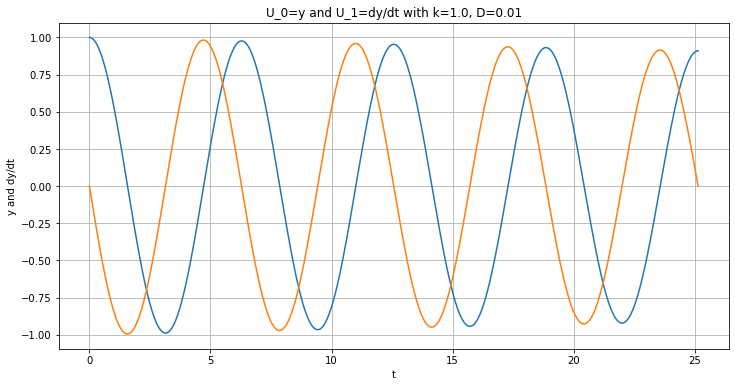

In [7]:
figure(figsize=[12,6])
title(f"U_0=y and U_1=dy/dt with k={k}, D={D}")
plot(t, U)
xlabel('t')
ylabel('y and dy/dt')
grid(True)

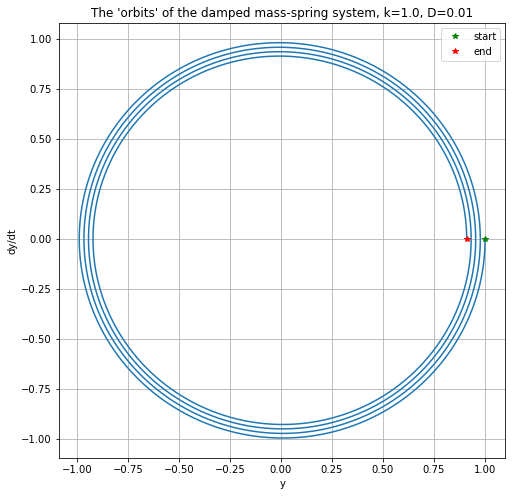

In [8]:
figure(figsize=[8,8])  # Make axes equal length; orbits should be circular or "circular spirals" 
if D == 0.:
    title(f"The 'orbits' of the undamped mass-spring system, k={k}")
else:
    title(f"The 'orbits' of the damped mass-spring system, k={k}, D={D}")
plot(y, Dy)
xlabel('y')
ylabel('dy/dt')
plot(y[0], Dy[0], "g*", label="start")
plot(y[-1], Dy[-1], "r*", label="end")
legend()
grid(True)

---
This work is licensed under [Creative Commons Attribution-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-sa/4.0/)